File: digit_example.png, Predicted digit: 5


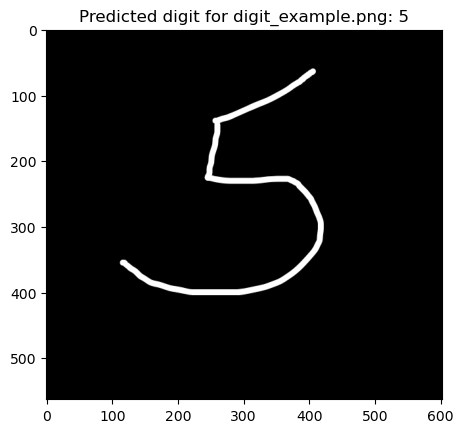

File: digit_example1.png, Predicted digit: 4


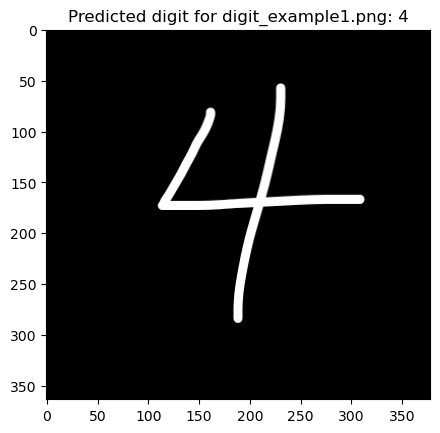

File: digit_example2.png, Predicted digit: 1


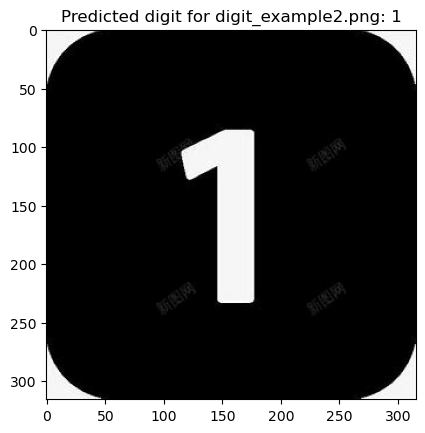

File: digit_example3.png, Predicted digit: 3


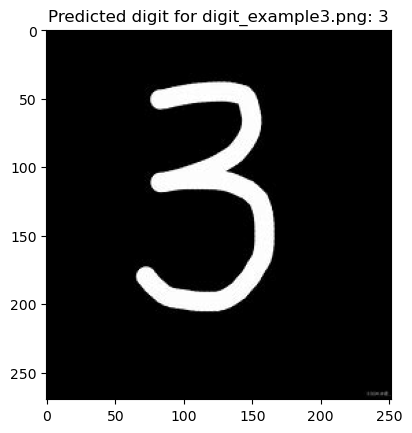

File: digit_example4.png, Predicted digit: 6


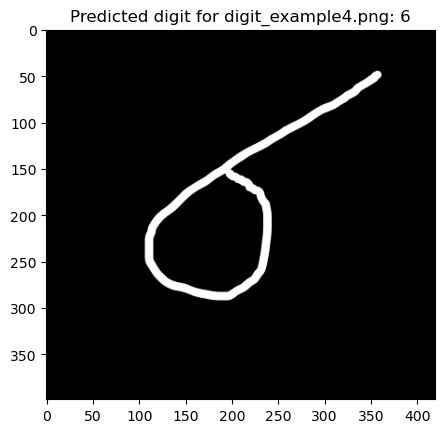

File: digit_example5.png, Predicted digit: 3


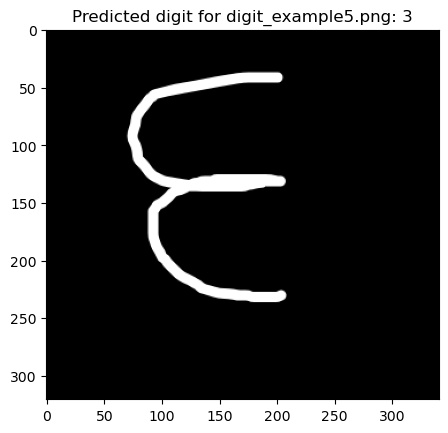

File: digit_example_fail1.png, Predicted digit: 5


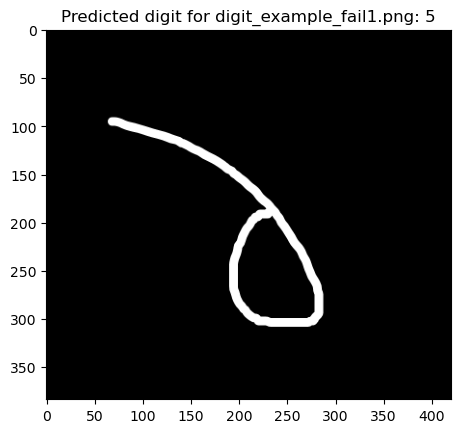

File: digit_example_fail2.png, Predicted digit: 1


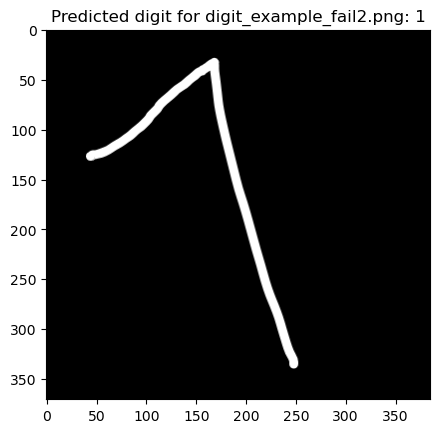

In [2]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 模型结构要与训练时相同,ctrl+c再ctrl+v即可
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 第一层卷积：输入通道1（灰度图像），输出通道32，卷积核大小3x3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        # 第二层卷积：输入通道32，输出通道64，卷积核大小3x3
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # 最大池化层：核大小2x2，步长2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # 全连接层1：将特征图展平到64*7*7，输出128个特征
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # 全连接层2：输出10个特征（对应10个类别）
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # 第一层卷积、ReLU激活和池化
        x = self.pool(torch.relu(self.conv1(x)))
        # 第二层卷积、ReLU激活和池化
        x = self.pool(torch.relu(self.conv2(x)))
        # 将特征展平为1维向量，以便输入到全连接层
        x = x.view(-1, 64 * 7 * 7)
        # 第一个全连接层和ReLU激活
        x = torch.relu(self.fc1(x))
        # 第二个全连接层（输出层）
        x = self.fc2(x)
        return x

# 加载训练好的模型
model = CNN()
model.load_state_dict(torch.load('./model/myCNNmodel_MNIST.pth', weights_only=True))
model.eval()

# 预处理转换
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 设置包含图像文件的文件夹路径
folder_path = './images'  # 替换为你的文件夹路径

# 遍历文件夹内的所有.png文件并进行预测
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path).convert('L')
        img_tensor = transform(img).unsqueeze(0)  # 增加批次维度

        # 进行推理
        with torch.no_grad():
            output = model(img_tensor)
        
        # 获取预测结果
        # _ 用来接收 torch.max 返回的最大值,后续并不需要
        _, predicted = torch.max(output, 1)

        # 显示结果 
        print(f'File: {filename}, Predicted digit: {predicted.item()}')
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted digit for {filename}: {predicted.item()}')
        plt.show()